<a href="https://colab.research.google.com/github/Sunnyg83/Stock_Price_Google/blob/main/Stock_Market_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [ ]:
def load_and_preprocess(file_path):
  df = pd.read_csv(file_path)
  df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
  df = df.dropna()
  return df

In [ ]:
train_df = load_and_preprocess("Google_train_data.csv")
test_df = load_and_preprocess("Google_test_data.csv")

In [ ]:
train_data = train_df.iloc[:, 4:5].values
test_data = test_df.iloc[:, 4:5].values

In [ ]:
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

In [ ]:
def create_dataset(dataset, look_back=60):
  X, Y = [], []
  for i in range(look_back, len(dataset)):
    X.append(dataset[i-look_back:i, 0])
    Y.append(dataset[i, 0])
  return np.array(X), np.array(Y)

In [ ]:
X_train, y_train = create_dataset(train_data)
X_test, y_test = create_dataset(test_data)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))



In [ ]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
35/35 - 17s - 495ms/step - loss: 0.0308
Epoch 2/20
35/35 - 9s - 245ms/step - loss: 0.0096
Epoch 3/20
35/35 - 9s - 250ms/step - loss: 0.0077
Epoch 4/20
35/35 - 8s - 234ms/step - loss: 0.0077
Epoch 5/20
35/35 - 7s - 202ms/step - loss: 0.0057
Epoch 6/20
35/35 - 8s - 235ms/step - loss: 0.0050
Epoch 7/20
35/35 - 7s - 202ms/step - loss: 0.0056
Epoch 8/20
35/35 - 5s - 141ms/step - loss: 0.0049
Epoch 9/20
35/35 - 6s - 175ms/step - loss: 0.0043
Epoch 10/20
35/35 - 9s - 264ms/step - loss: 0.0042
Epoch 11/20
35/35 - 7s - 202ms/step - loss: 0.0038
Epoch 12/20
35/35 - 8s - 234ms/step - loss: 0.0037
Epoch 13/20
35/35 - 7s - 203ms/step - loss: 0.0029
Epoch 14/20
35/35 - 10s - 272ms/step - loss: 0.0028
Epoch 15/20
35/35 - 9s - 256ms/step - loss: 0.0028
Epoch 16/20
35/35 - 6s - 173ms/step - loss: 0.0022
Epoch 17/20
35/35 - 9s - 260ms/step - loss: 0.0026
Epoch 18/20
35/35 - 7s - 204ms/step - loss: 0.0019
Epoch 19/20
35/35 - 5s - 141ms/step - loss: 0.0017
Epoch 20/20
35/35 - 5s - 147ms/step - 

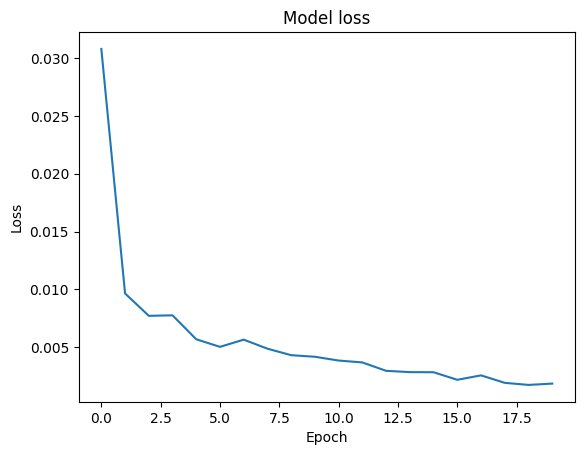

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [ ]:
y_pred = model.predict(X_test)
predicted_price = scaler.inverse_transform(y_pred)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


In [ ]:
testData = pd.read_csv("Google_test_data.csv")
testData["Close"]=pd.to_numeric(testData.Close,errors="coerce")
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values

inputClose = testData.iloc[:,0:].values
inputClose_scale = scaler.transform(inputClose)
inputClose_scale.shape

X_test = []
length = len(testData)
for i in range (60,length):
    X_test.append(inputClose_scale[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(192, 60, 1)

In [ ]:
y_pred = model.predict(X_test)
y_pred

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([[1.1960213],
       [1.2616032],
       [1.3592007],
       [1.2988603],
       [1.2290471],
       [1.1879314],
       [1.2121835],
       [1.2491369],
       [1.2951128],
       [1.2696133],
       [1.1446708],
       [1.1786604],
       [1.2485628],
       [1.1953884],
       [1.2391645],
       [1.2417564],
       [1.3266095],
       [1.3234528],
       [1.306596 ],
       [1.3423225],
       [1.2011594],
       [1.2627814],
       [1.2286061],
       [1.2231969],
       [1.273387 ],
       [1.2979778],
       [1.2694347],
       [1.2077483],
       [1.1532009],
       [1.2090489],
       [1.2079778],
       [1.151895 ],
       [1.0773236],
       [1.085427 ],
       [1.2626088],
       [1.2673807],
       [1.1826969],
       [1.1779813],
       [1.2284882],
       [1.1548374],
       [1.2846621],
       [1.3044331],
       [1.2777851],
       [1.2749262],
       [1.2747403],
       [1.2466538],
       [1.2240144],
       [1.3254652],
       [1.3343966],
       [1.3202063],


In [ ]:
predicted_price = scaler.inverse_transform(y_pred)

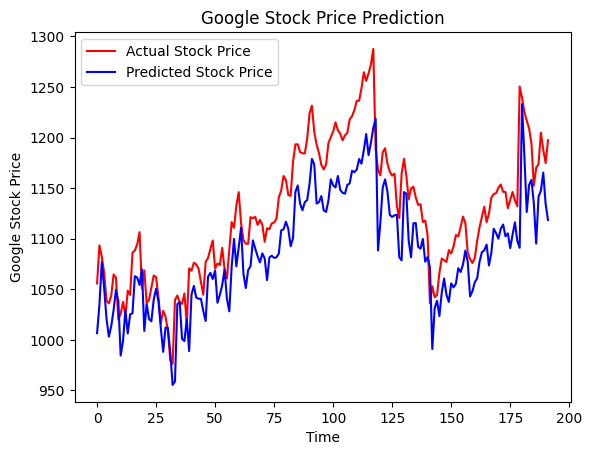

In [ ]:
plt.plot(y_test, color="red", label="Actual Stock Price")
plt.plot(predicted_price, color="blue", label="Predicted Stock Price")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()